In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,  StandardScaler
from matplotlib.pyplot import (figure, plot, title, xlabel, ylabel, 
                               colorbar, imshow, xticks, yticks, show)
from sklearn import model_selection, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, DistanceMetric
import numpy as np

## Import file

In [119]:
# Load the heart csv data using the Pandas library
filename = 'heart.csv'
df = pd.read_csv(filename)


In [120]:
# Select columns 1 to 18
selected_columns = df.iloc[:, 0:18]

# Calculate basic summary statistics
summary_statistics = selected_columns.describe()

# Display the summary statistics
print(summary_statistics)

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


In [121]:
# drop the data set
df = df.drop(df[(df.BMI > summary_statistics.BMI['mean']+2*summary_statistics.BMI['std'])
            & (df.BMI < summary_statistics.BMI['mean']-2*summary_statistics.BMI['std'])
            & (df.PhysicalHealth > summary_statistics.PhysicalHealth['mean']+2*summary_statistics.PhysicalHealth['std'])
            & (df.PhysicalHealth < summary_statistics.PhysicalHealth['mean']-2*summary_statistics.PhysicalHealth['std'])
            & (df.MentalHealth > summary_statistics.MentalHealth['mean']+2*summary_statistics.MentalHealth['std'])
            & (df.MentalHealth < summary_statistics.MentalHealth['mean']-2*summary_statistics.MentalHealth['std'])
            & (df.SleepTime > summary_statistics.SleepTime['mean']+2*summary_statistics.SleepTime['std'])
            & (df.SleepTime < summary_statistics.SleepTime['mean']-2*summary_statistics.SleepTime['std'])].index)

In [122]:
# Count the number of 'yes' and 'no' values in the 'label' column
yes_count = df['HeartDisease'].value_counts()['Yes']
no_count = df['HeartDisease'].value_counts()['No']


# Determine the label to balance (either 'yes' or 'no')
label_to_balance = 'Yes' if yes_count > no_count else 'No'
label_to_keep = 'Yes' if yes_count <= no_count else 'No'

# Calculate the difference in counts
count_diff = yes_count 

# Get the columns where the label is equal to label_to_balance
columns_to_balance = df[df['HeartDisease'] == label_to_balance]

# Randomly sample rows to make the counts equal
sampled_rows = columns_to_balance.sample(n=count_diff, random_state=42)

# Concatenate the sampled rows with the rows where the label is equal to label_to_keep
balance = pd.concat([df[df['HeartDisease'] == label_to_keep], sampled_rows])

# Shuffle the rows to randomize the order
balance = balance.sample(frac=1, random_state=42)

df = balance 


print(len(df))

54746


In [128]:
# Transforme the discrete string into integer
encoder = LabelEncoder()
for col in df:
  if col != "BMI":
    df[col] = encoder.fit_transform(df[col])

In [129]:
# Extract the data matrix, the class label and attribute names from the csv
raw_data = df.values

Data = raw_data[:,1:]
Label = df.values [:,0]
Attributes = np.asarray(df.columns[1:].str.slice(0, 3))

In [127]:
# Summary of Dataset in percentages
percentage_results = {}

# Loop Through Columns
for column in df.columns:
    percentages = df[column].value_counts(normalize=True) * 100
    percentage_results[column] = percentages
    print(percentages)


Yes    50.0
No     50.0
Name: HeartDisease, dtype: float64
26.63    1.181822
24.41    0.812845
27.12    0.783619
27.44    0.761699
27.46    0.717861
           ...   
54.09    0.001827
45.77    0.001827
31.86    0.001827
39.65    0.001827
17.76    0.001827
Name: BMI, Length: 2532, dtype: float64
No     50.895043
Yes    49.104957
Name: Smoking, dtype: float64
No     94.399591
Yes     5.600409
Name: AlcoholDrinking, dtype: float64
No     90.676944
Yes     9.323056
Name: Stroke, dtype: float64
0.0     62.747963
30.0    10.998064
2.0      4.531838
3.0      2.814818
5.0      2.796551
1.0      2.760019
15.0     2.380083
10.0     2.321631
20.0     1.590984
4.0      1.585504
7.0      1.505133
14.0     1.030212
25.0     0.615570
6.0      0.493187
8.0      0.345231
12.0     0.279472
21.0     0.253900
28.0     0.244767
29.0     0.135170
9.0      0.107770
18.0     0.076718
27.0     0.060278
16.0     0.060278
17.0     0.060278
13.0     0.038359
24.0     0.036532
22.0     0.032879
26.0     0.027399


In [43]:
# Assign each type of class with a number by making a Python dictionary
# and extract the class vector y, convert to NumPy array
classNames = np.unique(Label)
classDict = dict(zip(classNames,range(len(classNames))))

y = np.asarray([classDict[value] for value in Label])

In [130]:
# Compute values of number of data(N), attributes(M) and classes(C).
N = len(y)
M = len(Attributes)
C = len(classNames)

In [131]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Data,Label,test_size=0.8)
print(X_train)

[[30.18  0.    0.   ...  0.    0.    0.  ]
 [32.55  1.    0.   ...  0.    0.    0.  ]
 [24.41  1.    0.   ...  0.    0.    1.  ]
 ...
 [26.19  1.    0.   ...  0.    0.    0.  ]
 [34.17  1.    0.   ...  0.    1.    0.  ]
 [32.11  1.    0.   ...  0.    0.    0.  ]]


[False False False ...  True False False]
[ True  True  True ... False  True  True]


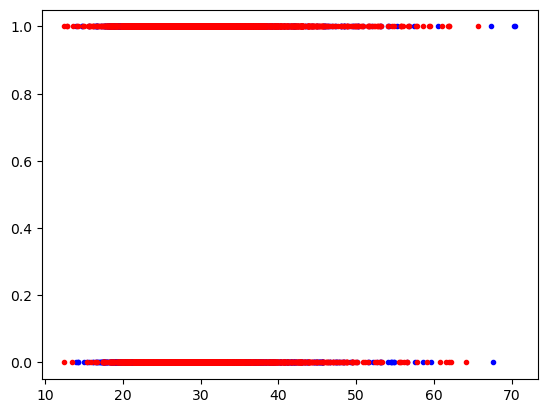

In [132]:
# Plot the training data points (color-coded) and test data points.
figure(1)
styles = ['.b', '.r', '.g', '.y']
for c in range(C):
    class_mask = (y_train==c)
    print(class_mask)
    plot(X_train[class_mask,0], X_train[class_mask,1], styles[c])


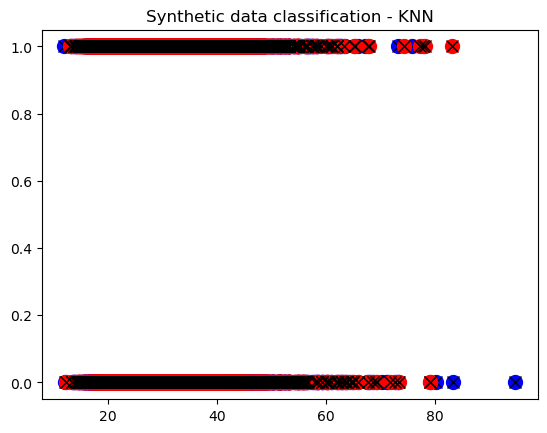

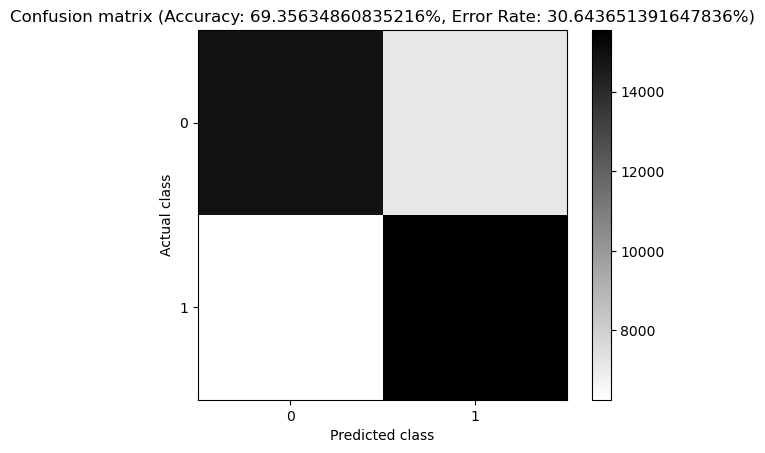

Ran Exercise 6.3.1


In [136]:
K=3



# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
dist= 2
#metric = 'minkowski'
#metric_params = {} # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
metric = 'cosine' 
metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
#metric='mahalanobis'
#metric_params={'V': cov(X_train, rowvar=False)}

# Fit classifier and classify the test points
knclassifier = KNeighborsClassifier(n_neighbors=K, p=dist, 
                                    metric=metric,
                                    metric_params=metric_params)
knclassifier.fit(X_train, y_train)
y_est = knclassifier.predict(X_test)


# Plot the classfication results
styles = ['ob', 'or', 'og', 'oy']
for c in range(C):
    class_mask = (y_est==c)
    plot(X_test[class_mask,0], X_test[class_mask,1], styles[c], markersize=10)
    plot(X_test[class_mask,0], X_test[class_mask,1], 'kx', markersize=8)
title('Synthetic data classification - KNN');

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_est);
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
figure(2);
imshow(cm, cmap='binary', interpolation='None');
colorbar()
xticks(range(C)); yticks(range(C));
xlabel('Predicted class'); ylabel('Actual class');
title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

show()

print('Ran Exercise 6.3.1')